## Opening Coffee Shop in New York, Capstone Project

## Introduction: Business Problem

In this project, we examining opening a new coffeeshop in New York. I love coffee shop, and this year, I will be moving to New York. We have many considerations for choosing a location for a coffeeshop, and what customer segment to focus on. We explore two datasets to help examine this question.

## Data

First dataset is taken from Foursquare. In choosing a coffeeshop location, we examine coffeeshops around Manhattan, the prime location for coffeshops (and where I will be moving to). We want to visualize where coffeeshops are located, so we can a place to avoid competition.

Second dataset is census data taken from Kaggle. We first examine a model for predicting income using the census data. We then use census data for identifying potential segments for coffeeshops, which will help when we focus on who to target our offerings. In examining potential segments, as a starting point, we want to understand their income and many other demographic characteristics that can be used to understand the segment more. This understanding helps determine product offering, and secondarily, choosing location of coffeeshop.

## Packages to Install

Some preliminary packages to install

In [311]:
#!pip install beautifulsoup4
# Beautiful soup - for scraping data from HTML.

In [312]:
#!pip install geocoder
#geocoder, for taking lat lon data

In [313]:
#!pip install folium
#import folium # plotting library

In [314]:
#!pip install geopy
#Make it easy for Python developers to locate the coordinate of addresses, cities, countries, 
#and landmarks across the globe using third party geocoders and other data 
#sources.

## Examining Coffeeshops around Manhattan

We first retrieve the coffeeshop data from Foursquare. They are in JSON format, which requires some manipulation to be in a dataframe. Examining this data should give us an idea on choosing locations around Manhattan.

In [315]:
import numpy as np 
#Numpy, many different computing services, such as data array, functions.
import pandas as pd 
#Panda - data frames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
#For reading and working with JSON data
from geopy.geocoders import Nominatim
#Nominatim is an API, get data from OpenStreetMap
import requests
#Requests allows you to send HTTP/1.1 requests extremely easily, but JSON
#method seems to be better
from pandas.io.json import json_normalize
#Turn JSON data into dataframe
import matplotlib.cm as cm
#Matplotlib is visualization package
import matplotlib.colors as colors
from sklearn.cluster import KMeans
#sklearn.cluster for cluster analysis
from bs4 import BeautifulSoup
#Beautiful soup - for scraping data from HTML.
import folium
#Folium is for visualizing data, seaborn is also a visualizing package.

print('Libraries imported.')

Libraries imported.


In [316]:
CLIENT_ID = 'AZ5B451IML2PEU4AYQMWH4BYBBK0VAGE1XW405VDD5ARZHE1' # your Foursquare ID
CLIENT_SECRET = 'XVOXZOF1RIHDFX0RIQHNXQEIL1NXXDDF4CWLNC352WDCEPHL' # your Foursquare Secret
ACCESS_TOKEN = 'JVP0CYFI0X1O2S21N44G1I303FDAJBY1ZJUI0X0YRVLVJQRE' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#https://foursquare.com/oauth2/authenticate?client_id=AZ5B451IML2PEU4AYQMWH4BYBBK0VAGE1XW405VDD5ARZHE1&response_type=code&redirect_uri=https://www.google.com

#https://www.google.com/#access_token=JVP0CYFI0X1O2S21N44G1I303FDAJBY1ZJUI0X0YRVLVJQRE

#Link for easier method https://stackoverflow.com/questions/45432268/how-do-i-get-access-token-from-foursquare

Your credentails:
CLIENT_ID: AZ5B451IML2PEU4AYQMWH4BYBBK0VAGE1XW405VDD5ARZHE1
CLIENT_SECRET:XVOXZOF1RIHDFX0RIQHNXQEIL1NXXDDF4CWLNC352WDCEPHL


In [317]:
address = 'Manhattan, NY 10036'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

#https://api.foursquare.com/v2/venues/search?client_id=AZ5B451IML2PEU4AYQMWH4BYBBK0VAGE1XW405VDD5ARZHE1&client_secret=XVOXZOF1RIHDFX0RIQHNXQEIL1NXXDDF4CWLNC352WDCEPHL&ll=40.7149555,-74.0153365&v=VERSION&query=QUERY&radius=RADIUS&limit=LIMIT

40.7810178 -73.95929967500001


In [318]:
search_query = 'Coffee'
radius = 5000
print(search_query + ' .... OK!')

Coffee .... OK!


In [319]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=AZ5B451IML2PEU4AYQMWH4BYBBK0VAGE1XW405VDD5ARZHE1&client_secret=XVOXZOF1RIHDFX0RIQHNXQEIL1NXXDDF4CWLNC352WDCEPHL&ll=40.7810178,-73.95929967500001&oauth_token=JVP0CYFI0X1O2S21N44G1I303FDAJBY1ZJUI0X0YRVLVJQRE&v=20180604&query=Coffee&radius=5000&limit=30'

In [320]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '608f66a4be490c4fa871b663'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '5dbf3656eb5a0d000859a595',
    'name': '787 Coffee',
    'location': {'address': '228 E 80th St',
     'lat': 40.774461,
     'lng': -73.955438,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.774461,
       'lng': -73.955438}],
     'distance': 799,
     'postalCode': '10075',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['228 E 80th St', 'New York, NY 10075']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1620010660',
    'hasPerk': False},
   {'id': '4a773e0df964a

In [321]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood,venuePage.id
0,5dbf3656eb5a0d000859a595,787 Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}]",v-1620010660,False,228 E 80th St,40.774461,-73.955438,"[{'label': 'display', 'lat': 40.774461, 'lng': -73.955438}]",799,10075,US,New York,NY,United States,"[228 E 80th St, New York, NY 10075]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4a773e0df964a520f1e31fe3,Joe Coffee Company,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}]",v-1620010660,False,514 Columbus Ave,40.785768,-73.972978,"[{'label': 'display', 'lat': 40.78576794628144, 'lng': -73.97297822944773}, {'label': 'entrance', 'lat': 40.785701, 'lng': -73.972949}]",1268,10024,US,New York,NY,United States,"[514 Columbus Ave (btwn W 84th & W 85th St), New York, NY 10024]",btwn W 84th & W 85th St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ad37f3969e77b635ca4a5a6,Joe Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}]",v-1620010660,False,271 Amsterdam Ave,40.779012,-73.981032,"[{'label': 'display', 'lat': 40.779012, 'lng': -73.981032}]",1845,10023,US,New York,NY,United States,"[271 Amsterdam Ave, New York, NY 10023]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4ef4c5b099111bd0a9b8e9c2,Joe the Art of Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}]",v-1620010660,False,1045 Lexington Ave,40.772044,-73.960805,"[{'label': 'display', 'lat': 40.7720441944042, 'lng': -73.96080496387015}, {'label': 'entrance', 'lat': 40.772032, 'lng': -73.960875}]",1006,10021,US,New York,NY,United States,"[1045 Lexington Ave (btwn E 74th & E 75th St), New York, NY 10021]",btwn E 74th & E 75th St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5177d30c498e9b657328e30f,Coffee Cart - 97th & Columbus,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'Food Truck', 'pluralName': 'Food Trucks', 'shortName': 'Food Truck', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_', 'suffix': '.png'}, 'primary': True}]",v-1620010660,False,W 97th Street,40.792637,-73.965920,"[{'label': 'display', 'lat': 40.79263720008189, 'lng': -73.96591960790946}]",1408,10025,US,New York,NY,United States,"[W 97th Street (Columbus Ave), New York, NY 10025]",Columbus Ave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,58a5d1d2fc9b210eb0d17c39,WFM Coffee Bar,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}]",v-1620010660,False,1551 3rd Ave,40.779500,-73.953490,"[{'label': 'display', 'lat': 40.7795, 'lng': -73.95349}]",518,10128,US,New York,NY,United States,"[1551 3rd Ave, New York, NY 10128]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4a4281c6f964a520e9a51fe3,Gotham Coffee House,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/c

In [322]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,787 Coffee,Coffee Shop,228 E 80th St,40.774461,-73.955438,"[{'label': 'display', 'lat': 40.774461, 'lng': -73.955438}]",799,10075,US,New York,NY,United States,"[228 E 80th St, New York, NY 10075]",NaN,NaN,5dbf3656eb5a0d000859a595
1,Joe Coffee Company,Coffee Shop,514 Columbus Ave,40.785768,-73.972978,"[{'label': 'display', 'lat': 40.78576794628144, 'lng': -73.97297822944773}, {'label': 'entrance', 'lat': 40.785701, 'lng': -73.972949}]",1268,10024,US,New York,NY,United States,"[514 Columbus Ave (btwn W 84th & W 85th St), New York, NY 10024]",btwn W 84th & W 85th St,NaN,4a773e0df964a520f1e31fe3
2,Joe Coffee,Coffee Shop,271 Amsterdam Ave,40.779012,-73.981032,"[{'label': 'display', 'lat': 40.779012, 'lng': -73.981032}]",1845,10023,US,New York,NY,United States,"[271 Amsterdam Ave, New York, NY 10023]",NaN,NaN,5ad37f3969e77b635ca4a5a6
3,Joe the Art of Coffee,Coffee Shop,1045 Lexington Ave,40.772044,-73.960805,"[{'label': 'display', 'lat': 40.7720441944042, 'lng': -73.96080496387015}, {'label': 'entrance', 'lat': 40.772032, 'lng': -73.960875}]",1006,10021,US,New York,NY,United States,"[1045 Lexington Ave (btwn E 74th & E 75th St), New York, NY 10021]",btwn E 74th & E 75th St,NaN,4ef4c5b099111bd0a9b8e9c2
4,Coffee Cart - 97th & Columbus,Food Truck,W 97th Street,40.792637,-73.965920,"[{'label': 'display', 'lat': 40.79263720008189, 'lng': -73.96591960790946}]",1408,10025,US,New York,NY,United States,"[W 97th Street (Columbus Ave), New York, NY 10025]",Columbus Ave,NaN,5177d30c498e9b657328e30f
5,WFM Coffee Bar,Coffee Shop,1551 3rd Ave,40.779500,-73.953490,"[{'label': 'display', 'lat': 40.7795, 'lng': -73.95349}]",518,10128,US,New York,NY,United States,"[1551 3rd Ave, New York, NY 10128]",NaN,NaN,58a5d1d2fc9b210eb0d17c39
6,Gotham Coffee House,Coffee Shop,1298 2nd Ave,40.766418,-73.960219,"[{'label': 'display', 'lat': 40.766417653227954, 'lng': -73.96021931346488}, {'label': 'entrance', 'lat': 40.766344, 'lng': -73.959949}]",1627,10065,US,New York,NY,United States,"[1298 2nd Ave (btw 68th St & 69th St), New York, NY 10065]",btw 68th St & 69th St,NaN,4a4281c6f964a520e9a51fe3
7,Irving Farm Coffee Roasters,Coffee Shop,224 W 79th St,40.783582,-73.979369,"[{'label': 'display', 'lat': 40.78358219999489, 'lng': -73.97936938995414}, {'label': 'entrance', 'lat': 40.78344, 'lng': -73.97945}]",1715,10024,US,New York,NY,United States,"[224 W 79th St (btwn Broadway & Amsterdam Ave), New York, NY 10024]",btwn Broadway & Amsterdam Ave,NaN,4fc64ab9e4b0acb95c508a5f
8,Coffee Cart,Café,E 75th St.,40.772595,-73.960714,"[{'label': 'display', 'lat': 40.77259522403001, 'lng': -73.96071367012681}]",945,10021,US,New York,NY,United States,"[E 75th St. (Lexington), New York, NY 10021]",Lexington,NaN,4d761ea174eca093bf19b7a8
9,Neil's Coffee Shop,Diner,961 Lexington Ave,40.769038,-73.963146,"[{'label': 'display', 'lat': 40.76903847170227, 'lng': -73.96314605175094}, {'label': 'entrance', 'lat': 40.768961, 'lng': -73.963113}]",1372,10021,US,New York,NY,United States,"[961 Lexington Ave (at E 70th St.), New York, NY 10021]",at E 70th St.,NaN,4b5c5b25f964a520362c29e3


In [323]:
dataframe_filtered.name

0     787 Coffee                           
1     Joe Coffee Company                   
2     Joe Coffee                           
3     Joe the Art of Coffee                
4     Coffee Cart - 97th & Columbus        
5     WFM Coffee Bar                       
6     Gotham Coffee House                  
7     Irving Farm Coffee Roasters          
8     Coffee Cart                          
9     Neil's Coffee Shop                   
10    Sant Ambroeus Coffee Bar             
11    Variety Coffee Roasters              
12    Birch Coffee                         
13    Coffee Room                          
14    Coffee Cart                          
15    Dear Mama & lama Coffee              
16    Sant Ambroeus Coffee Bar at Sotheby's
17    Coffee Cart - 96th St                
18    Brooklyn Bagel & Coffee Co.          
19    Birch Coffee                         
20    Mud Coffee                           
21    Nordstrom Coffee Bar                 
22    Blue Bottle Coffee        

Above, we see the coffeeshops around Manhattan

In [324]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Here, we see the area left and right of Central park has concentrated competition with other coffeshops. Potential places with less competition here would be North of central park, or south of central park.

## Examine An Example 

Let's look an example of one Coffeeshop, and examine a review to see what a customer values in a Coffeeshop.

In [325]:
venue_id = '5dbf3656eb5a0d000859a595' # ID of 787 Coffee, to get a sense of typical coffeeshop
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
url

'https://api.foursquare.com/v2/venues/5dbf3656eb5a0d000859a595?client_id=AZ5B451IML2PEU4AYQMWH4BYBBK0VAGE1XW405VDD5ARZHE1&client_secret=XVOXZOF1RIHDFX0RIQHNXQEIL1NXXDDF4CWLNC352WDCEPHL&oauth_token=JVP0CYFI0X1O2S21N44G1I303FDAJBY1ZJUI0X0YRVLVJQRE&v=20180604'

In [326]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'like', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '5dbf3656eb5a0d000859a595',
 'name': '787 Coffee',
 'contact': {'phone': '6468500234', 'formattedPhone': '(646) 850-0234'},
 'location': {'address': '228 E 80th St',
  'lat': 40.774461,
  'lng': -73.955438,
  'labeledLatLngs': [{'label': 'display',
    'lat': 40.774461,
    'lng': -73.955438}],
  'postalCode': '10075',
  'cc': 'US',
  'city': 'New York',
  'state': 'NY',
  'country': 'United States',
  'formattedAddress': ['228 E 80th St', 'New York, NY 10075']},
 'canonicalUrl': 'https://foursquare.com/v/787-coffee/5dbf3656eb5a0d000859a595',
 'categories': [{'id': '4bf58dd8d48988d1e0931735',
   'name': 'Coffee Shop',
   'pluralName': 'Coffee Shops',
   'shortName': 'Coffee Shop',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 4},
 'url': 'http://coffeeshops.787coffee.com',
 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'},
 'hasMenu': True,
 'likes'

In [327]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.4


In [328]:
result['response']['venue']['tips']['count']

4

In [329]:
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&oauth_token={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '608f66bbfbc3a15e3e3f3ce4'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'tips': {'count': 4,
   'items': [{'id': '5e488e3ad3b6c20006153f8d',
     'createdAt': 1581813306,
     'text': 'The rum-infused cold brew is great! The staff is great! Once they saw that I was going to transfer my coffee into a travel mug so they just filled that instead - even though it’s a good 4oz larger!',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/5e488e3ad3b6c20006153f8d',
     'likes': {'count': 0, 'groups': []},
     'like': False,
     'logView': True,
     'agreeCount': 3,
     'disagreeCount': 0,
     'todo': {'count': 0},
     'user': {'id': '5551385',
      'firstName': 'Jason',
      'lastName': 'Randazza',
      'gender': 'male',
      'countryCode': 'US',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/BL1OI5YNQMNSGN0L.jpg'}},
     'authorInteractionType

In [330]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'likes', 'like', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user', 'authorInteractionType'])

In [331]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered.reindex()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.id
0,The rum-infused cold brew is great! The staff is great! Once they saw that I was going to transfer my coffee into a travel mug so they just filled that instead - even though it’s a good 4oz larger!,3,0,5e488e3ad3b6c20006153f8d,Jason,Randazza,5551385


This review identifies cold brew is potential menu item valued and great service.

In [332]:
dataframe_filtered.to_csv('New_york_Coffee2.csv', index=None)

## New York Census

We next examine the New York Census data, for two reasons: see what factors influence income, and creating potential customer segments. We see what factors examine income, as we mainly choose our customers based on what income we be expecting.

In [333]:
#https://www.kaggle.com/muonneutrino/new-york-city-census-data?select=nyc_census_tracts.csv
#Adding census data to New York Coffee 

In [334]:
body = client_e62f91b0886f492aab87325966a572b5.get_object(Bucket='capstone-donotdelete-pr-gfbsfl934soisp',Key='nyc_census_tracts_prepared.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,CensusTract,County,Borough,TotalPop,Income,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,72034.0,20.0,20.7,28.7,17.1,23.9,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,74836.0,13.2,23.6,32.2,23.4,24.9,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,32312.0,26.3,35.9,19.1,36.1,26.2,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,37936.0,37.1,31.5,35.4,20.9,26.2,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


## Data Wrangling, Deal with Missing

This dataset has many nulls. Need to deal with it first, chose to fill nulls with average.

In [335]:
avg_norm_loss = df_data_2["TotalPop"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 3888.6677434240887


In [336]:
df_data_2["TotalPop"].replace(np.nan, avg_norm_loss, inplace=True)

In [337]:
avg_norm_loss = df_data_2["Income"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 59101.32079961923


In [338]:
df_data_2["Income"].replace(np.nan, avg_norm_loss, inplace=True)

In [339]:
avg_norm_loss = df_data_2["Poverty"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 19.565599999999996


In [340]:
df_data_2["Poverty"].replace(np.nan, avg_norm_loss, inplace=True)

In [341]:
avg_norm_loss = df_data_2["ChildPoverty"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 24.483815851922166


In [342]:
df_data_2["ChildPoverty"].replace(np.nan, avg_norm_loss, inplace=True)

In [343]:
avg_norm_loss = df_data_2["Professional"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 36.54764595103579


In [344]:
df_data_2["Professional"].replace(np.nan, avg_norm_loss, inplace=True)

In [345]:
avg_norm_loss = df_data_2["Service"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 24.23168549905838


In [346]:
df_data_2["Service"].replace(np.nan, avg_norm_loss, inplace=True)

In [347]:
avg_norm_loss = df_data_2["Office"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 23.43130885122411


In [348]:
df_data_2["Office"].replace(np.nan, avg_norm_loss, inplace=True)

In [349]:
avg_norm_loss = df_data_2["Construction"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 6.633568738229756


In [350]:
df_data_2["Construction"].replace(np.nan, avg_norm_loss, inplace=True)

In [351]:
avg_norm_loss = df_data_2["Production"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 9.156873822975516


In [352]:
df_data_2["Production"].replace(np.nan, avg_norm_loss, inplace=True)

In [353]:
avg_norm_loss = df_data_2["Drive"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 24.8756120527307


In [354]:
df_data_2["Drive"].replace(np.nan, avg_norm_loss, inplace=True)

In [355]:
avg_norm_loss = df_data_2["Carpool"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 5.08804143126177


In [356]:
df_data_2["Carpool"].replace(np.nan, avg_norm_loss, inplace=True)

In [357]:
avg_norm_loss = df_data_2["Transit"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 54.93088512241055


In [358]:
df_data_2["Transit"].replace(np.nan, avg_norm_loss, inplace=True)

In [359]:
avg_norm_loss = df_data_2["Walk"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 9.04806967984934


In [360]:
df_data_2["Walk"].replace(np.nan, avg_norm_loss, inplace=True)

In [361]:
avg_norm_loss = df_data_2["OtherTransp"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 2.306920903954802


In [362]:
df_data_2["OtherTransp"].replace(np.nan, avg_norm_loss, inplace=True)

In [363]:
avg_norm_loss = df_data_2["WorkAtHome"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 3.749105461393597


In [364]:
df_data_2["WorkAtHome"].replace(np.nan, avg_norm_loss, inplace=True)

In [365]:
avg_norm_loss = df_data_2["MeanCommute"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 40.83157644824311


In [366]:
df_data_2["MeanCommute"].replace(np.nan, avg_norm_loss, inplace=True)

In [367]:
avg_norm_loss = df_data_2["Employed"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 1813.4983848638672


In [368]:
df_data_2["Employed"].replace(np.nan, avg_norm_loss, inplace=True)

In [369]:
avg_norm_loss = df_data_2["PrivateWork"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 79.53620527306968


In [370]:
df_data_2["PrivateWork"].replace(np.nan, avg_norm_loss, inplace=True)

In [371]:
avg_norm_loss = df_data_2["PublicWork"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 14.19354990583804


In [372]:
df_data_2["PublicWork"].replace(np.nan, avg_norm_loss, inplace=True)

In [373]:
avg_norm_loss = df_data_2["SelfEmployed"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 6.1512711864406775


In [374]:
df_data_2["SelfEmployed"].replace(np.nan, avg_norm_loss, inplace=True)

In [375]:
avg_norm_loss = df_data_2["FamilyWork"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 0.11864406779661017


In [376]:
df_data_2["FamilyWork"].replace(np.nan, avg_norm_loss, inplace=True)

In [377]:
avg_norm_loss = df_data_2["Unemployment"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 9.757788235294116


In [378]:
df_data_2["Unemployment"].replace(np.nan, avg_norm_loss, inplace=True)

In [379]:
df_data_2.head(5)

,CensusTract,County,Borough,TotalPop,Income,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,59101.3208,19.5656,24.483816,36.547646,24.231685,23.431309,6.633569,9.156874,24.875612,5.088041,54.930885,9.04807,2.306921,3.749105,40.831576,0,79.536205,14.19355,6.151271,0.118644,9.757788
1,36005000200,Bronx,Bronx,5403,72034.0000,20.0000,20.700000,28.700000,17.100000,23.900000,8.000000,22.300000,44.800000,13.700000,38.600000,2.90000,0.000000,0.000000,43.000000,2308,80.800000,16.20000,2.900000,0.000000,7.700000
2,36005000400,Bronx,Bronx,5915,74836.0000,13.2000,23.600000,32.200000,23.400000,24.900000,9.000000,10.500000,41.300000,10.000000,44.600000,1.40000,0.500000,2.100000,45.000000,2675,71.700000,25.30000,2.500000,0.600000,9.500000
3,36005001600,Bronx,Bronx,5879,32312.0000,26.3000,35.900000,19.100000,36.100000,26.200000,4.900000,13.800000,37.200000,5.300000,45.500000,8.60000,1.600000,1.700000,38.800000,2120,75.000000,21.30000,3.800000,0.000000,8.700000
4,36005001900,Bronx,Bronx,2591,37936.0000,37.1000,31.500000,35.400000,20.900000,26.200000,6.600000,11.000000,19.200000,5.300000,63.900000,3.00000,2.400000,6.200000,45.400000,1083,76.800000,15.50000,7.700000,0.000000,19.200000


Null are now dealt with!

## Regression, Examining Income

In [380]:
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt

In [381]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

Let's first examine relation between TotalPop and Income

(0.0, 256102.3)

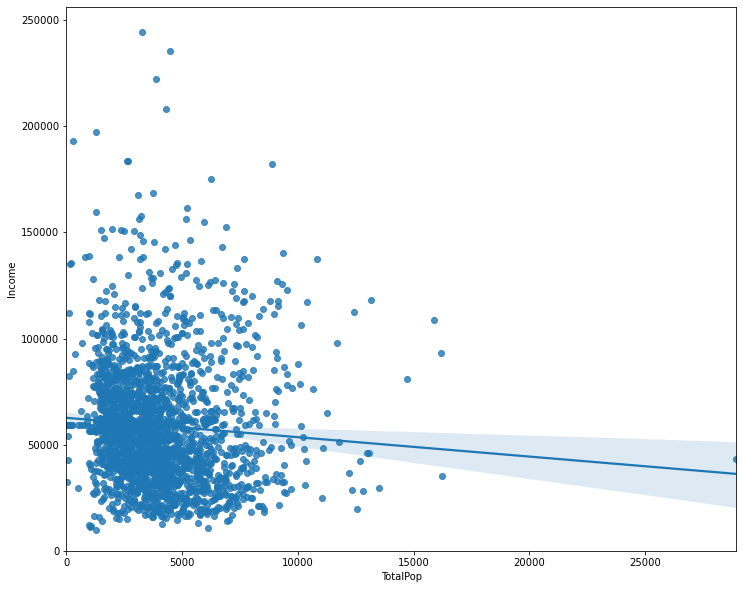

In [382]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="TotalPop", y="Income", data=df_data_2)
plt.ylim(0,)

This plot suggests total population would be a bad variable to predict income on

(0.0, 256102.3)

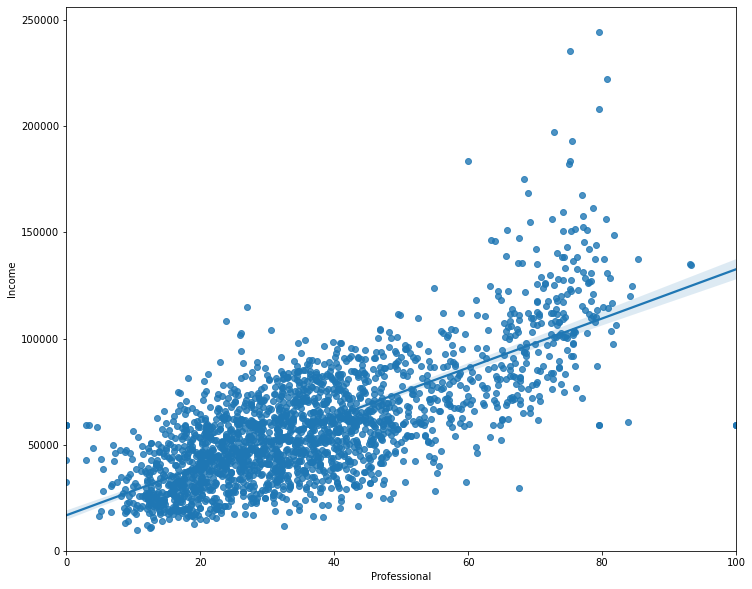

In [383]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Professional", y="Income", data=df_data_2)
plt.ylim(0,)

(0.0, 266278.9370928028)

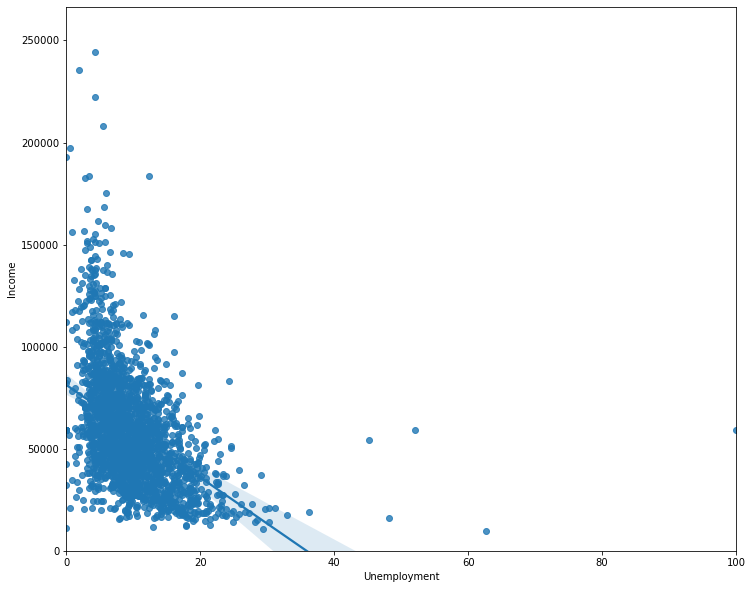

In [384]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Unemployment", y="Income", data=df_data_2)
plt.ylim(0,)

We see here Professional and Unemployment have a linear relationship with Income, so let's create a model based on these two chosen variables.

In [385]:
lm = LinearRegression()
lm

LinearRegression()

In [386]:
Xs = df_data_2[['Professional', 'Unemployment']]
Y = df_data_2['Income']

In [387]:
lm.fit(Xs, Y)

LinearRegression()

In [388]:
lm.intercept_

29339.708418947055

In [389]:
lm.coef_

array([1039.49752326, -843.38529058])

Our Model for predicting income, is therefore, as follows:

Income(YHat) = 29340 + 1039*(Professional Percentage) - 843*(Unemployment Rate)

The interpretation for this model is as follows: 

(1) as percentage of Professional in an area increases, the average income of the area goes up by $ 1039.

(2) as percentage of Unemployment in an area increases, the average income of the area goes down by $ 843.

## KMeans, Examining Potential Customer Segments

Let's next create potential customer segments. I based customer segment on demograhpics. Demographics is a good starting point when better data is not yet available.

In [391]:
from sklearn.tree import DecisionTreeClassifier

In [392]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 

In [393]:
Xs = df_data_2[['Income', 'Poverty', 'ChildPoverty', 'Unemployment','Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute','Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment']]

In [394]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [395]:
k_means.fit(Xs)

KMeans(n_clusters=4, n_init=12)

In [396]:
k_means_labels = k_means.labels_

In [397]:
df_data_2["Clus_km"] = k_means_labels
df_data_2.head(5)

,CensusTract,County,Borough,TotalPop,Income,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Clus_km
0,36005000100,Bronx,Bronx,7703,59101.3208,19.5656,24.483816,36.547646,24.231685,23.431309,6.633569,9.156874,24.875612,5.088041,54.930885,9.04807,2.306921,3.749105,40.831576,0,79.536205,14.19355,6.151271,0.118644,9.757788,0
1,36005000200,Bronx,Bronx,5403,72034.0000,20.0000,20.700000,28.700000,17.100000,23.900000,8.000000,22.300000,44.800000,13.700000,38.600000,2.90000,0.000000,0.000000,43.000000,2308,80.800000,16.20000,2.900000,0.000000,7.700000,0
2,36005000400,Bronx,Bronx,5915,74836.0000,13.2000,23.600000,32.200000,23.400000,24.900000,9.000000,10.500000,41.300000,10.000000,44.600000,1.40000,0.500000,2.100000,45.000000,2675,71.700000,25.30000,2.500000,0.600000,9.500000,2
3,36005001600,Bronx,Bronx,5879,32312.0000,26.3000,35.900000,19.100000,36.100000,26.200000,4.900000,13.800000,37.200000,5.300000,45.500000,8.60000,1.600000,1.700000,38.800000,2120,75.000000,21.30000,3.800000,0.000000,8.700000,3
4,36005001900,Bronx,Bronx,2591,37936.0000,37.1000,31.500000,35.400000,20.900000,26.200000,6.600000,11.000000,19.200000,5.300000,63.900000,3.00000,2.400000,6.200000,45.400000,1083,76.800000,15.50000,7.700000,0.000000,19.200000,3


In [398]:
df_data_2.groupby('Clus_km').mean()

,CensusTract,TotalPop,Income,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Clus_km,,,,,,,,,,,,,,,,,,,,,,,
0,3.606166e+10,3358.097669,58423.435264,15.761216,20.047034,35.472529,23.566773,23.648442,7.537895,9.776521,28.277526,5.639496,53.620231,7.251573,1.968699,3.238970,41.947351,1626.912320,79.145457,14.519337,6.222203,0.113209,9.075169
1,3.605978e+10,4638.979167,140329.697917,6.609375,2.930208,73.769792,4.965625,18.676042,1.114583,1.480208,8.496875,1.905208,51.465625,22.998958,6.365625,8.769792,28.464583,2841.656250,84.211458,6.996875,8.614583,0.172917,4.511458
2,3.606362e+10,3783.477855,88180.545455,8.409557,9.021874,50.852448,15.120979,22.319580,5.496270,6.206294,34.764802,5.835431,44.782751,7.547086,2.460839,4.613054,39.395105,2031.566434,77.071562,16.657809,6.151981,0.121212,6.902331
3,3.604058e+10,4497.493927,32566.723347,32.328745,41.622628,24.750877,32.810796,24.426991,6.907422,11.106208,17.135762,4.397166,62.848718,10.294062,2.103239,3.218758,41.908722,1780.920378,80.832524,13.303104,5.745479,0.116734,12.920648


Here, created 4 potential segments. I note that not all variables appears to be points of difference, such as the total population. Let's examine the variables that are point of differences.

Cluster 0 and Cluster 3 - They are the lower income segments, with high poverty and higher unemployment. They are lower Professional percentage work, high percentage in service jobs, higher in construction jobs, more likely to use public transit, less likely to work from home and takes longer to commute.

Cluster 1 and Cluster 2 - These are higher income segment, but they have some differences that worth discussing separatedly. In general, both have higher income, lower poverty, lower unemployment, and high in Professional jobs. The point of differences are as follows:

Cluster 1 - The highest average income, and even higher than cluster 2. They have lowest average commute, least likely to drive, and most likely to walk. Potentially, this means higher income can rent property much closer to their work that allows them to walk. 

Cluster 2 - The second highest average income, they are most likely to drive and carpool

These are the higher income segments, with cluster 1 having dramatically higher average income than Cluster 2. With this, there is also lower poverty, lower unemployment, high in professional jobs. There is a difference, the higher income people are less likely to drive, but the lower income is most likely to drive. The high income cluster 1 also has lowest mean commute, probably higher income allows living closer to employment. This goes well with higher income is most likely to walk compared to other segments, if live close, can walk to work. Cluster 

In [306]:
df_data_2.groupby('Clus_km').count()

,CensusTract,County,Borough,TotalPop,Income,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Clus_km,,,,,,,,,,,,,,,,,,,,,,,,,
0,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902
1,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431
2,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738
3,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96


Counting the number of people in each segment:

Cluster 0 - 902
Cluster 1 - 431
Cluster 2 - 738
Cluster 3 - 96

Note that the highest population, Cluster 0, is the second lowest income; while cluster 3, the lowest population, is the lowest income.

## Results and Discussion

Here is recap of results:

Left and right of central park is more crowded with coffeeshops, while up and down of central park is less crowded with coffeeshops. Professional jobs and unemployment are predictive of income in New York. Finally, there are 4 potential clusters, with cluster 0 and 3 being lower income, and cluster 1 and 2 being higher income.

Putting this together, our two decision points is choosing location and choosing what segment to focus on. After we chose our segment, we can use the segment's characteristics to decide how to serve this market with coffee offerings.

Cluster 0 appears attractive. Cluster 0 is the largest population, but second lowest income. This means we can serve with lower margin coffee. They have high transit use and have high commute. This means the train or bus stops make important areas to designate coffeeshop, and we can choose lower or upper of central park stops to avoid competition.

Cluster 1 appears attractive. Cluster 1 is somewhat sizeable at 431, and has the highest income. This means we can serve higher margin coffee. Additionally, they are most likely to walk, meaning we can choose locations where they likely frequent. If we choose Cluster 1, there is a good chance number of them are from the financial district, south of central park, and also where there is less coffeeshops. This could be an attractive market opportunity.

Cluster 2 also appears attractive. This segment appears diverse, and we might need a broad coffee offering to appeal to everyone in this cluster. They are also likely to drive, potentially means they can be serviced with a drive thru. The higher income also means we can give them higher offerings. It is unclear where they are disperse in Manhattan.

Lastly, Cluster 3 small population size and low income makes them a very unattractive segment.


## Conclusion

We now need to decide a segment. As a newer coffeeshop trying to break into the market, Cluster 1 appears most attractive. We can serve a lower niche that is easily to scale to 431. This is because as a startup in general, you want high margin, lower volume. We should serve the larger cluster 1, aim lower of central park / lower Manhattan. When creating our product offering, we understand we can charge more, these people are likely to walk to work, have mainly Professional jobs, and likely to live close by to work.